In [ ]:
import pandas as pd
import statsmodels.formula.api as smf

train_df = pd.read_csv('train_df.csv', sep=',')

model = smf.ols(formula='Umsatz ~ snow_weather + rain_weather + Windgeschwindigkeit + KielerWoche + Feiertag + is_weekend + Season_Temp_Fall_high + Season_Temp_Fall_low + Season_Temp_Spring_high + Season_Temp_Spring_middle + Season_Temp_Spring_low + Season_Temp_Summer_high + Season_Temp_Summer_low + Season_Temp_Summer_middle + Season_Temp_Winter_high + Season_Temp_Winter_middle + Season_Temp_Winter_low + Umsatz_one_week_ago + Warengruppe_1 + Warengruppe_2 + Warengruppe_3 + Warengruppe_6 + Warengruppe_5', data=train_df).fit()

print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                 Umsatz   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     1219.
Date:                Thu, 05 Dec 2024   Prob (F-statistic):               0.00
Time:                        20:49:49   Log-Likelihood:                -41924.
No. Observations:                7445   AIC:                         8.390e+04
Df Residuals:                    7421   BIC:                         8.406e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

(1841, 37)
(1841, 1)


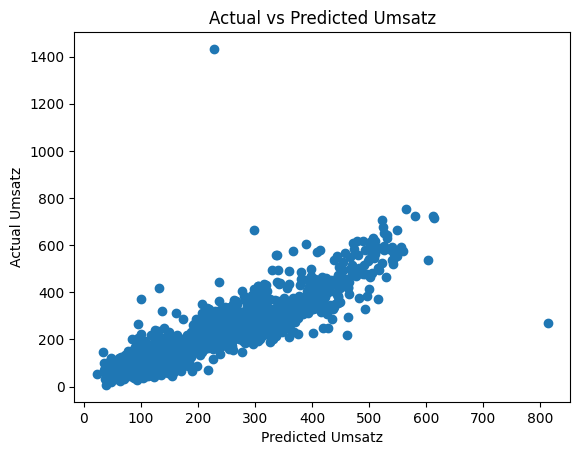

In [22]:
# Load validation_df
validation_df = pd.read_csv('validation_df.csv')
print(validation_df.shape)


# Assuming predictions is a list or numpy array
predictions = model.predict(validation_df)

# Convert predictions to DataFrame
predictions_df = pd.DataFrame(predictions, columns=['prediction'])
print(predictions_df.shape)

validation_df['prediction'] = predictions_df['prediction']

import matplotlib.pyplot as plt

plt.scatter(validation_df['prediction'], validation_df['Umsatz'])
plt.xlabel('Predicted Umsatz')
plt.ylabel('Actual Umsatz')
plt.title('Actual vs Predicted Umsatz')
plt.show()